In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import dirname, join as pjoin
import scipy
import scipy.io as sio
from scipy.io import loadmat
import os

In [51]:
slopes = []
dim_slopes = []
mats = []
A0_list = []
A0_err_list = []
m_exp_list = []
errors = []

### MatLab $\rightarrow$ Python

In [3]:
#mult dimensionless c value with speed scale U
def c(a): 
    return ((2*a**2*np.log(a)-a**2+1)/(a-1)**2)
def dc(a):
    return ((4*a*np.log(a)/((a-1)**2)) - 2*(1 - a**2 + 2*a**2*np.log(a))/((a-1)**3))

In [52]:
dataDir = "Experimental_data_soliton_project"
for file in os.listdir('Experimental_data_soliton_project/'):
    mats = scipy.io.loadmat('Experimental_data_soliton_project/'+file,squeeze_me=False)
    mats;
    U0 = mats['U0'][0]
    A0 = mats['A0'][0]
    A0_err = mats['A0_error']
    
    z_list = []
    z_list_cm = []
    t_list = []
    t_list_sec = []
    
    A0_list.append(A0)
    A0_err_list.append(A0_err)
    
    for i in range(len(mats['Amat'][0])):
        z = i
        z_list.append(z)
        z_cm = mats['z_vec'][0][z]
        z_list_cm.append(z_cm)
    #zth element of z vector is ~dimensionalized~        
        t = np.argmax(mats['Amat'][:,z], axis=0)
        t_list.append(t)
        t_sec = mats['t_vec'][0][t]
        t_list_sec.append(t_sec)
        
    m_exp, b_exp = np.polyfit(z_list[1000:3000], t_list[1000:3000], 1)
    m_exp_list.append(m_exp)
    m_dim, b_dim = np.polyfit(t_list_sec[1000:3000], z_list_cm[1000:3000], 1)
    m_anly = c(A0)*U0
    m_anly_err = (abs(dc(A0))*A0_err)*U0
    
    slopes.append([m_exp,m_anly,m_anly_err])
    dim_slopes.append(m_dim/U0)
    #exp slope, anly slope, anly slope error
    errors.append([abs(m_anly-m_exp),abs(m_anly-m_exp)/m_anly])
    #abs error, rel error
    
#     plt.plot(z_list,t_list, color = 'r')
#     plt.plot(z_list, np.array(z_list)*m_exp + b_exp, color = 'r')
#     plt.imshow(mats['Amat'], origin = 'lower', aspect = 'auto')
#     plt.show()

In [46]:
# plt.plot(z_list, t_list, '-')
# plt.plot(z_list, np.array(z_list)*m_exp_list + b, color = 'r')
# plt.xlabel("Vertical distance (nondimensional)")
# plt.ylabel("Time (nondimensional)")
# plt.legend(["Experimental Data", "Line of best fit"])
# #plt.imshow(mats['Amat'], origin='lower', aspect='auto')

In [40]:
# A0_list.clear() #exp slope, anly slope, anly slope error, abs error, rel error

#### Experimental

Text(0, 0.5, 'Speed')

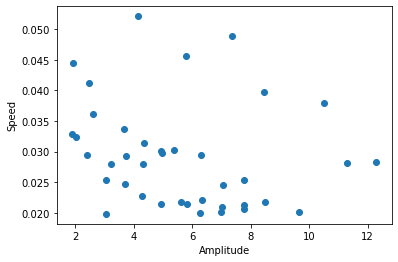

In [53]:
#Speed (y) vs amplitude (x) --> c(a)
plt.scatter(A0_list,m_exp_list) #remove index dimension
plt.xlabel('Amplitude')
plt.ylabel('Speed')

<ipython-input-3-8da71b6c637a>:3: RuntimeWarning: invalid value encountered in true_divide
  return ((2*a**2*np.log(a)-a**2+1)/(a-1)**2)


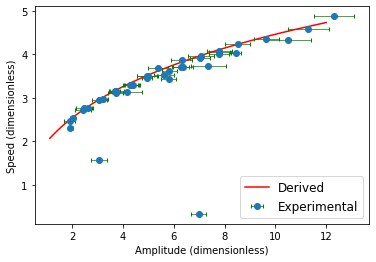

In [162]:
#Speed (y) vs amplitude (x) --> c(a)
a = np.linspace(1,12,100)
plt.plot(a,c(a), 'r', label=r'Derived')
#plt.scatter(A0_list,[x + 0.35 for x in dim_slopes],s=50,label=r'Experimental',edgecolors='black')
xerr = np.array(A0_err_list)
plt.xlabel('Amplitude (dimensionless)')
plt.ylabel('Speed (dimensionless)')
plt.errorbar(A0_list,[x + 0.36 for x in dim_slopes],xerr = xerr.ravel(), fmt='o', ecolor='g',elinewidth=0.7,capsize=2,label=r'Experimental')
plt.legend(loc='lower right', prop={'size': 12})
plt.savefig('Speed-amp.pdf')

In [88]:
xerr.ravel()

array([0.3, 0.5, 0.3, 0.3, 0.4, 0.3, 0.2, 0.5, 0.2, 0.4, 0.1, 0.4, 0.4,
       0.4, 0.2, 0.3, 0.7, 0.3, 0.3, 0.3, 0.4, 0.5, 0.4, 0.4, 0.3, 0.3,
       0.3, 0.4, 0.5, 0.2, 0.6, 0.9, 0.2, 0.8, 0.2, 0.8, 0.1, 0.3, 0.3])

In [ ]:
xlpha, yeta = euler((f,y0,t0,tf,h))
plt.plot(xlpha,yeta)